本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
[Getting data:]###############################################################################

<BarContainer object of 10 artists>

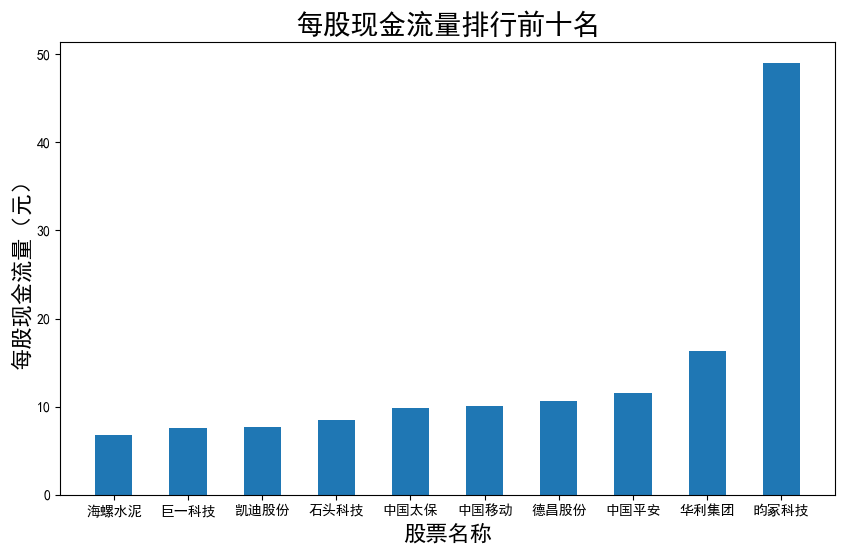

In [1]:
# 导入库
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt

# 获取数据
ts_data=ts.get_report_data(2018,4)

# 将数据转换为DataFrame数据
df1=pd.DataFrame(ts_data)

df1.duplicated().sum()
df1.isna().sum()

# 重复数据处理
df1=df1.drop_duplicates()

# 空值处理
df1=df1.dropna(axis=1, how='all')
df1=df1.dropna(axis=0, subset=['epcf'])

# 对数据进行排序，并选择最好的十只股票
df1=df1.sort_values('epcf')
df1=df1[-10:]

#设置X轴,Y轴数据
y=df1['epcf']
x=df1['name']

#解决汉字显示乱码
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

#设置画布大小
plt.figure(figsize=(10,6),dpi=100)

# 添加标签 
plt.xlabel('股票名称',fontsize='16') 
plt.ylabel('每股现金流量（元）',fontsize='16')  
plt.title('每股现金流量排行前十名',fontsize='20')  
plt.bar(x,y,width=0.5)
